In [161]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import seaborn
import glob
import os
import urllib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style
import datetime as dt
from dateutil import parser
%matplotlib inline

In [162]:
style.use('fivethirtyeight')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [163]:
print(plt.__file__)

C:\Users\Komron\Anaconda3\lib\site-packages\matplotlib\pyplot.py


In [164]:
path = r'C:\Users\Komron\Documents\PythonData\project_one'
all_files = glob.glob(os.path.join(path, '*.csv'))

df_from_each_file = (pd.read_csv(f) for f in all_files)

concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,29-Dec-17,99.400002,99.690002,98.750000,98.750000,7144300,98.750000
1,28-Dec-17,99.519997,99.620003,99.120003,99.400002,9763900,99.400002
2,27-Dec-17,99.559998,99.599998,98.830002,99.260002,5140800,99.260002
3,26-Dec-17,98.349998,99.440002,98.349998,99.160004,4295900,99.160004
4,22-Dec-17,98.290001,98.419998,97.680000,98.209999,5478700,98.209999


In [165]:
concatenated_df['Date'] = pd.to_datetime(concatenated_df['Date'])
concatenated_df = concatenated_df.sort_values(by='Date')

In [176]:
#smaller_df = concatenated_df.iloc[0:500]
#smaller_df.head(10)

In [177]:
MA1 = 10
MA2 = 30

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

In [178]:
def high_minus_low(highs, lows):
    return highs-lows

In [179]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

In [180]:
def graph_data(stock):

    fig = plt.figure(facecolor='#f0f0f0')
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
    plt.ylabel('Price')
    ax2v = ax2.twinx()
    
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    plt.ylabel('MAvgs')

In [182]:
date = concatenated_df['Date'].tolist()
closep = concatenated_df['Close'].tolist()
highp = concatenated_df['High'].tolist()
lowp = concatenated_df['Low'].tolist()
openp = concatenated_df['Open'].tolist()
volume = concatenated_df['Volume'].tolist()

In [183]:
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    #months = np.arange(0,13,1)    
    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    start = len(date[MA2-1:])
    
    h_l = list(map(high_minus_low, highp, lowp))
        

In [184]:
#ma1 = np.insert(ma1, 0, [0,0,0,0,0,0,0,0,0], axis=0)
short_date = date[9:]
short_date_2 = date[29:]

Text(0,0.5,'(Red) = 10-day & (Green) = 30-day')

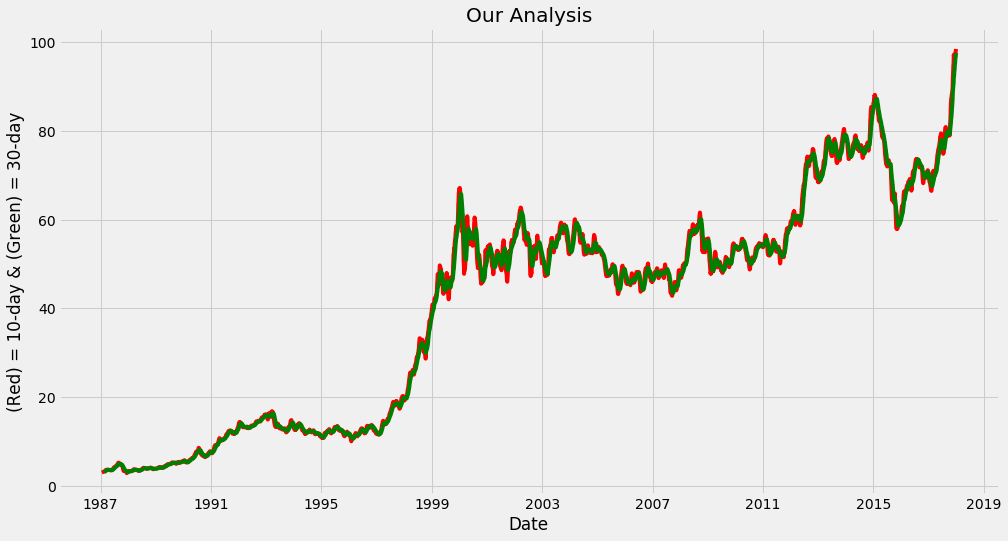

In [185]:
plt.figure(figsize=(15,8))

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")

plt.title("Our Analysis")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day & (Green) = 30-day")
